In [1]:
from scipy import misc

# load the ascent image
ascent_image = misc.ascent()

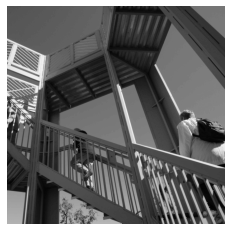

In [2]:
import matplotlib.pyplot as plt

# Visualize the image
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [3]:
import numpy as np

# Copy image to a numpy array
image_transformed = np.copy(ascent_image)
# i = np.copy(ascent_image)
# Get the dimensions of the image
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]
image_transformed.shape
# size_x = i.shape[0]
# size_y = i.shape[1]
# i.shape

(512, 512)

In [4]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]

# A couple more filters to try for fun!
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [5]:
i = image_transformed
# Iterate over the image
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x-1, y-1] * filter[0][0])
      convolution = convolution + (i[x-1, y] * filter[0][1])  
      convolution = convolution + (i[x-1, y+1] * filter[0][2])     
      convolution = convolution + (i[x, y-1] * filter[1][0])    
      convolution = convolution + (i[x, y] * filter[1][1])    
      convolution = convolution + (i[x, y+1] * filter[1][2])    
      convolution = convolution + (i[x+1, y-1] * filter[2][0])    
      convolution = convolution + (i[x+1, y] * filter[2][1])    
      convolution = convolution + (i[x+1, y+1] * filter[2][2])    
      
      # Multiply by weight
      convolution = convolution * weight   
      
      # Check the boundaries of the pixel values
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255

      # Load into the transformed image
      image_transformed[x, y] = convolution

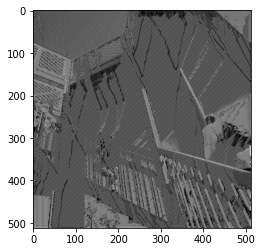

In [6]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i)
plt.show()   

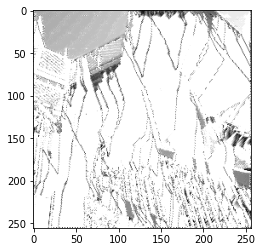

In [7]:
i_transformed = i
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    
    # Store all the pixel values in the (2,2) pool
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])

    # Get only the largest value and assign to the reduced image
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- it is now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()      